# LA Area Strain Curves : CRT-17

## Follow up on TB Case

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
'''
This function drops the column with cell indice from area-strains.csv files
'''

def clean_areastrains_df(df):
    
    df = df.drop(labels='Unnamed: 0', axis=1)
    
    return df

# Plotting 10-phase curve

Normal tracking using only 1 cardiac cycle

In [16]:
# Array of DataFrames for 10 frame strain
ar_df_10 = np.zeros((9, 142010))

In [17]:
# Read in area strains wrt dcm0/Manual mesh for all 20 time phases
for i in range(1, 10):
    
    print(f'i = {i}')
    
    df = pd.read_csv(f'/home/csi20local/Dropbox/phd/Data/RG_CT_Cases/CT-CRT-17/MT-HiRes/SW-0.0-BE-4e-9/area-strains-{i}.csv')
    df = clean_areastrains_df(df)
    
    j = i-1
    ar_df_10[(j),:] = np.squeeze(df.to_numpy())

i = 1
i = 2
i = 3
i = 4
i = 5
i = 6
i = 7
i = 8
i = 9


In [20]:
# array of mean area change across ALL cells, for every time phase
ar_means_10 = ar_df_10.mean(axis=1)
ar_means_10

array([0.03017773, 0.10701852, 0.08995928, 0.1384769 , 0.15863388,
       0.20875388, 0.19958632, 0.20781194, 0.12134988])

In [21]:
# Following code appends 0 for dcm0 area change
ar_means_lst = list(ar_means_10)

test = [0]
test.extend(ar_means_10)

test

[0,
 0.03017773051181237,
 0.1070185242650921,
 0.08995927765152914,
 0.13847689788484657,
 0.15863388123685407,
 0.20875388442533743,
 0.19958632484926217,
 0.2078119424540299,
 0.12134988415816775]

In [22]:
ar_means_10 = np.array(test)

In [23]:
ar_means_10

array([0.        , 0.03017773, 0.10701852, 0.08995928, 0.1384769 ,
       0.15863388, 0.20875388, 0.19958632, 0.20781194, 0.12134988])

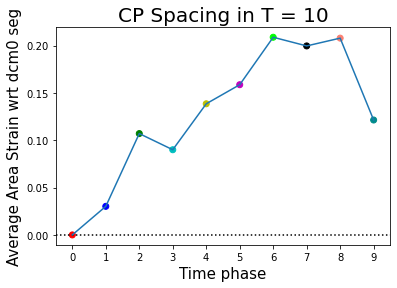

In [26]:
import matplotlib.pyplot as plt

my_colors = ['r', 'b', 'g', 'c', 'y', 'm', 'lime', 'k', 'salmon', 'darkcyan']
my_colors = 2*my_colors
my_colors = my_colors[0:10]

plt.plot(ar_means_10)
plt.scatter(np.arange(10), ar_means_10, c=my_colors)

plt.xlabel('Time phase', fontsize=15)
plt.ylabel('Average Area Strain wrt dcm0 seg', fontsize=15)
plt.xticks(np.arange(10))

plt.xlim(-0.5, 9.5)
# plt.ylim(-0.08, 0.1)

plt.title("CP Spacing in T = 10", fontsize=20)

plt.hlines(0.0, -0.5, 10.5, linestyles='dotted', color='black')